In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Leemos el dataset

In [55]:
df = pd.read_csv('Churners.csv')

Me genere un sample del todo el dataset y le agrege una seed para que siempre tenga los mismos datos no importa cuantas veces corra esta celda

In [56]:
df.sample(frac=1, random_state=42)

,id,Nombre,Email,Pais,Genero,Edad,Antigüedad,FacturacionTotal,PuntuacionCrediticia,CantidadProductos,PoseeTarjetaCredito,MiembroActivo,SalarioEstimado,VelocidadServicio,Abandono
7940,15688713,Estefanía Méndez Casas,burgosgaston@yahoo.com,Chile,Masculino,44,6,0.00,627,1,Si,Si,114469.55,20GB,No
1162,15708917,Eutropio del Porta,oscarferrer@gmail.com,Brasil,Masculino,53,10,167772.96,598,1,Si,Si,136886.86,2GB,No
582,15718280,Soraya Gárate Lobo,vtoledo@cepeda.es,Brasil,Masculino,39,5,139822.11,662,2,Si,Si,146219.90,100GB,No
4081,15712813,Lorenza de Royo,alonso90@zaragoza-molina.es,Brasil,Masculino,43,3,150805.17,520,3,No,Si,25333.03,500Mb,Si
8412,15608968,Ciriaco Escudero Esteban,jacinta93@domingo-palomares.es,Brasil,Masculino,21,6,86402.52,714,2,No,No,27330.59,1GB,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,15781914,Tomasa Hoyos,nbaena@trujillo.es,Brasil,Masculino,32,9,169947.41,718,2,Si,Si,27979.16,500Mb,Si
5191,15779904,Pastor Galván Vázquez,cayetana28@mate.es,Argentina,Femenino,29,5,0.00,597,2,Si,Si,174825.57,1GB,No
5390,15786993,Loreto Herminio Diez Llanos,vperez@zaragoza.com,Argentina,Femenino,51,5,0.00,810,2,No,Si,184524.74,500Mb,Si
860,15675231,Donato del Gordillo,pagesquique@arevalo-diaz.com,Argentina,Femenino,45,8,0.00,518,2,Si,Si,36193.07,100GB,No


In [57]:
df.head()

,id,Nombre,Email,Pais,Genero,Edad,Antigüedad,FacturacionTotal,PuntuacionCrediticia,CantidadProductos,PoseeTarjetaCredito,MiembroActivo,SalarioEstimado,VelocidadServicio,Abandono
0,15638513,Estrella de Alvarado,roxanafuster@rodenas.org,Argentina,Femenino,40,7,142856.95,723,2,No,No,38019.74,500Mb,Si
1,15805303,Dora Nieves Lerma Zurita,maximino90@gmail.com,Brasil,Masculino,44,1,141136.62,661,1,Si,No,189742.78,500Mb,Si
2,15685844,Adelina Contreras Cervera,somozaeufemia@revilla.es,Brasil,Femenino,35,8,141665.63,518,1,No,Si,192776.64,1GB,No
3,15658693,Ale del Portero,gisela65@amores.es,Argentina,Femenino,60,2,0.00,827,2,No,Si,60615.83,1GB,No
4,15676091,Salvador Ángel Gimeno,maximino64@navarrete-gonzalo.com,Argentina,Masculino,42,7,0.00,543,1,Si,Si,56650.47,500Mb,Si


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9000 non-null   int64  
 1   Nombre                9000 non-null   object 
 2   Email                 9000 non-null   object 
 3   Pais                  9000 non-null   object 
 4   Genero                9000 non-null   object 
 5   Edad                  9000 non-null   int64  
 6   Antigüedad            9000 non-null   int64  
 7   FacturacionTotal      9000 non-null   float64
 8   PuntuacionCrediticia  9000 non-null   int64  
 9   CantidadProductos     9000 non-null   int64  
 10  PoseeTarjetaCredito   9000 non-null   object 
 11  MiembroActivo         9000 non-null   object 
 12  SalarioEstimado       9000 non-null   float64
 13  VelocidadServicio     9000 non-null   object 
 14  Abandono              9000 non-null   object 
dtypes: float64(2), int64(

A primera vista no hay elementos vacios en ninguna de las columnas

Vamos a empezar a eliminar las variables que no van a aportar valor alguno al los modelos que vamos a crear

In [59]:
df.drop(['id', 'Nombre', 'Email'], inplace=True, axis=1)

In [60]:
df.head()

,Pais,Genero,Edad,Antigüedad,FacturacionTotal,PuntuacionCrediticia,CantidadProductos,PoseeTarjetaCredito,MiembroActivo,SalarioEstimado,VelocidadServicio,Abandono
0,Argentina,Femenino,40,7,142856.95,723,2,No,No,38019.74,500Mb,Si
1,Brasil,Masculino,44,1,141136.62,661,1,Si,No,189742.78,500Mb,Si
2,Brasil,Femenino,35,8,141665.63,518,1,No,Si,192776.64,1GB,No
3,Argentina,Femenino,60,2,0.00,827,2,No,Si,60615.83,1GB,No
4,Argentina,Masculino,42,7,0.00,543,1,Si,Si,56650.47,500Mb,Si


Quedo mucho mas limpio

Se va a generar un df de test que lo vamos unicamente usar alfinal cuando se decida que modelo utilizar. Este va a ser nuestra prueba de la vida real a ver como de "verdad" nuestro modelo se comporta

In [61]:
test_df = df.tail(1000)

In [62]:
df.drop(df.tail(1000).index, 
        inplace = True) 

In [63]:
test_df.head()

,Pais,Genero,Edad,Antigüedad,FacturacionTotal,PuntuacionCrediticia,CantidadProductos,PoseeTarjetaCredito,MiembroActivo,SalarioEstimado,VelocidadServicio,Abandono
8000,Argentina,Femenino,33,6,0.00,544,2,Si,Si,124113.04,1GB,No
8001,Argentina,Femenino,30,9,0.00,483,2,No,No,136356.97,500Mb,Si
8002,Brasil,Femenino,47,5,102085.72,466,1,Si,Si,183536.24,20GB,Si
8003,Brasil,Masculino,43,0,108508.82,850,3,Si,No,184044.80,2GB,Si
8004,Argentina,Femenino,31,3,162701.65,841,2,Si,Si,126794.56,1GB,No


In [64]:
test_df.shape

(1000, 12)

In [65]:
df.to_csv('train_churnes.csv')
test_df.to_csv('test_churnes.csv')

Generamos dos csv files uno con los datos de entrenamiento y validacion. Otro con los datos de test

In [312]:
df = pd.read_csv('train_churnes.csv')

Vamos a separar las variables categoricas de las numericas

In [313]:
var_num = df[['Edad', 
              'Antigüedad', 
              'PuntuacionCrediticia', 
              'FacturacionTotal', 
              'CantidadProductos', 
              'SalarioEstimado']]
var_num.shape

(8000, 6)

In [314]:
var_cat = df[['Genero', 'Pais', 'Pais', 'MiembroActivo', 'VelocidadServicio']]
var_cat.shape

(8000, 5)

Vamos a transformar dependiendo si son categoricos o numericos.

In [315]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [316]:
one_hot = OneHotEncoder()
scaler = RobustScaler()

In [317]:
var_cat_oh = one_hot.fit_transform(var_cat)

In [318]:
var_cat_oh.shape

(8000, 15)

In [319]:
var_num_sc = scaler.fit_transform(var_num)

In [320]:
df_cat = pd.DataFrame(var_cat_oh.toarray())
df_num = pd.DataFrame(var_num_sc)

In [323]:
df_cleaned = pd.concat([df_cat, df_num], axis=1)

In [324]:
df_cleaned.shape

(8000, 21)

In [325]:
df_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,0,1,2,3,4,5
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.250000,0.4,0.529851,0.359684,1.0,-0.631597
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.583333,-0.8,0.067164,0.346206,0.0,0.907798
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,-0.166667,0.6,-1.000000,0.350350,0.0,0.938579
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.916667,-0.6,1.305970,-0.759583,1.0,-0.402335
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.416667,0.4,-0.813433,-0.759583,0.0,-0.442568


Vamos a agarrar todas las variables X y tambien vamos a buscar las labels.

In [84]:
X = df_cleand

In [79]:
y = df.Abandono.values

In [80]:
from sklearn.preprocessing import LabelBinarizer

Vamos a utlizar el labelBinarizer para transformar las labels en numericas para poder pasarselas a nuestro modelo.

In [82]:
lb = LabelBinarizer()

In [83]:
y_lb = lb.fit_transform(y)

In [327]:
from sklearn.model_selection import train_test_split

Vamos a dividir los datos y agarrar 20% para la validacion

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y_lb, test_size=0.2, random_state=42)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Como primer modelo vamos a utilizar RandomForestClassifier ya que es un problema de classificacion. Es un algoritmo que combina muchos decision trees y genera una probabilidad por cada uno. El que mas diga que corresponde a cierta clase va a quedar esa clase como valor predicho. Suele ser muy utilizado y es muy buena para no generar overfit.

In [175]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, 
                               verbose=0, random_state=42, n_jobs = -1)

Me puse a jugar un poco con los hyperparametros y utilizaremos un RandomizedSearch Cross validation. Esto va a combinar de forma random los hyperparametros y nos va a devolver el mejor set de esas conbinaciones. Vamos a utilizar cross validation para evitar generar overfit y asegurarnos de que el modelo no se aprenda los datos de training de memoria. 

In [330]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=600)

Vamos a hacer un fit de los datos de prueba ya que se encontro gracias al random search los mejores hyperparameters para este random forest

In [176]:
rf_random.fit(X_train, y_train)

y_pred = rf_random.predict(X_test)

/home/juancruzalric/.pyenv/versions/3.7.9/envs/ai_tp/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [177]:
accuracy_score(y_pred, y_test)

0.890625

Vamos a predecir con los datos de validacion y encontraremos una accuracy de 89%.
Pero creo que por ahi lo podemos mejorar.

In [178]:
from sklearn.model_selection import GridSearchCV

Vamos a utilizar GridSearch para tantear un poco mas los hyperparameters ya que sabemos cuales eligio el random search ahora podemos hilar un poco mas fino pero manejando un poco mas manualmente los cambios

In [179]:
param_grid = {
    'n_estimators': [1100, 1250, 1200, 1250, 1300],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt'],
    'max_depth': [6, 8, 10, 12, 14, 16, 18],
    'bootstrap': [False]}

In [180]:
rf_grid_sch = RandomForestClassifier()

In [181]:
grid_search = GridSearchCV(
    estimator = rf_grid_sch, 
    param_grid = param_grid, 
    cv = 3, 
    n_jobs = -1, 
    verbose = 2)

Vamos a aplicar este nuevo grid search a ver como mejora la accuracy del modelo

In [331]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=7,
                       n_estimators=1200)

Se cambiaron un poco los hyperparametros vamos a ver que pasa cuando hacemos fit y predecimos con los datos de validacion

In [182]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 875 candidates, totalling 2625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 59.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 85.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 116.2min
[Parallel(n_jobs=-1)]: Done 2625 out of 2625 | elapsed: 118.2min finished
/home/juancruzalric/.pyenv/versions/3.7.9/envs/ai_tp/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1100, 1250, 1200, 1250, 1300]},
             verbose=2)

In [332]:
y_pred_gs = grid_search.predict(X_test)

In [333]:
accuracy_score(y_test, y_pred_gs)

0.886875

Lamentablemente no conseguimos ninguna mejora. Eso si estos algoritmos tardan bastante en correr. Ya que se generan CV y se buscan los diferentes hyperparametros.

## Tensorflow

Despues de haber probado con Random forest y aprovechado random search y grid search para poder encontrar los mejores hyperparameters me decidi por incluir una red neuronal. Elegi Tensorflow ya que esta disenada para este tipo de algoritmos. Aunque Scikit-learn tiene NN la verdad que me parecio mejor experimentar con TF. Lo primero que vamos a hacer es importar tensorflow 2.x, luego vamos a crear el modelo y vamos a intentar jugar con los hyperparameters y las diferentes capas que le podamos agregar.

In [151]:
import tensorflow as tf

In [224]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Vamos a crear una red sensilla con 4 capas. La primera va a ser una Densa de 32 neuronas con 'relu' como funcion de activacion. 'relu' es una funcion de activacion muy economica computacionalmente hablando ya que solamente le va a interesar los valores positivos a la funcion. Luego vamos a aplicarle un dropout del 20% de las weights para complicar un poco mas a la red de que haga overfitting. La segunda capa va a ser una Densa con 64 neuronas y 'relu' como funcion de activacion. La ultima capa va a tener una sigmoid como funcion de activacion que va a dar valores entre 0 y 1.

In [225]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch/20)
)

Vamos a crear un callback para poder iterar entre diferentes lr y esto nos va a sacar el trabajo de tener que hacerlo a mano.

In [226]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

Vamos a elegir como optimizador SGD (Stocastic Gradient Descent) solamente porque queria jugar un poco con el hyperparameter de momentum. Mas adelante voy a probar Adam a ver si modifica en algo a mi lr

In [227]:
model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

Vamos a compilar el modelo y agregar una loss "BinaryCrossentropy" ya que el enunciado es un problema de Clasificacion y generamos la label para que sea 0 o 1. La metrica que vamos a tener en cuenta va a ser la accuracy.

In [228]:
history = model.fit(
    x= X_train,
    y= y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    callbacks=[lr_schedule],
    verbose=0
)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Se le va a hacer fit al modelo y pasarle cada uno de sus parametros necesarios para hacer la prediccion. Le vamos a pasar el los datos de entrenamiento de las features y de la target. Va a tener 500 epochs y le vamos a pasar tambien el set de validation para estar un poco mas seguros de que el modelo no este haciendo overfitting o underfitting. Por ultimo le metemos la callback de la learning rate schedule.

(1e-08, 1.0, 0.0, 1.0)

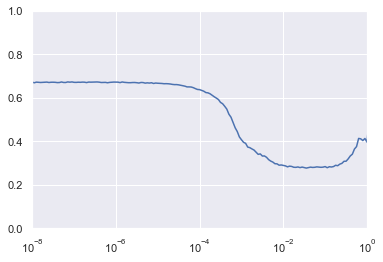

In [234]:
lrs = 1e-8 * (10 ** (np.arange(500)/20))
plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-8, 1, 0, 1])

Aca tenemos el grafico de la LR comparado con la loss. Podemos ver que en 1e-2 el la lr se empieza a estabilizar y no estamos viendo que baje mucho mas... despues de eso ya repunta para arriba. Por esta razon nos quedaremos con esta lr. 

In [294]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Volvemos a cargar el modelo

In [295]:
optimizer = tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9)

In [296]:
model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

In [297]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    validation_steps=8,
    verbose=2
)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

200/200 - 1s - loss: 0.5239 - accuracy: 0.7375 - val_loss: 0.3486 - val_accuracy: 0.8581
Epoch 2/20
200/200 - 0s - loss: 0.3597 - accuracy: 0.8506 - val_loss: 0.3076 - val_accuracy: 0.8675
Epoch 3/20
200/200 - 0s - loss: 0.3329 - accuracy: 0.8689 - val_loss: 0.3011 - val_accuracy: 0.8737
Epoch 4/20
200/200 - 0s - loss: 0.3110 - accuracy: 0.8714 - val_loss: 0.2882 - val_accuracy: 0.8806
Epoch 5/20
200/200 - 0s - loss: 0.3054 - accuracy: 0.8783 - val_loss: 0.2896 - val_accuracy: 0.8806
Epoch 6/

In [298]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

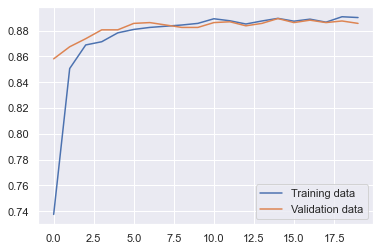

<Figure size 432x288 with 0 Axes>

In [299]:
plt.plot(epochs, acc, label="Training data")
plt.plot(epochs, val_acc, label="Validation data")
plt.legend(loc="lower right")
plt.figure()

Podemos ver que con solamente 20 epochs el modelo tiene una acc de 88% y se ve que gracias al dropout el modelo parece que no esta haciendo overfitting

In [300]:
loss=history.history['loss']
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

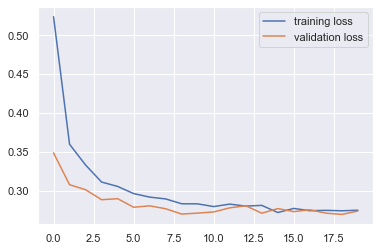

<Figure size 432x288 with 0 Axes>

In [301]:
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend(loc="upper right")
plt.figure()

En el grafico de la loss podemos que que ambas estan bajando y no parecen tener demaciados cambios abruptos.

Ahora queremos probar que pasa cuando le damos mas epochs a ver si el modelo sigue mejorando o empieza a hacer overfiting

In [303]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9)

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

history = model.fit(
    x= X_train,
    y= y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    validation_steps=20,
    verbose=2
)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

200/200 - 0s - loss: 0.5349 - accuracy: 0.7333 - val_loss: 0.3669 - val_accuracy: 0.8562
Epoch 2/100
200/200 - 0s - loss: 0.3647 - accuracy: 0.8453 - val_loss: 0.3223 - val_accuracy: 0.8600
Epoch 3/100
200/200 - 0s - loss: 0.3302 - accuracy: 0.8661 - val_loss: 0.3010 - val_accuracy: 0.8806
Epoch 4/100
200/200 - 0s - loss: 0.3100 - accuracy: 0.8753 - val_loss: 0.2849 - val_accuracy: 0.8856
Epoch 5/100
200/200 - 0s - loss: 0.3025 - accuracy: 0.8764 - val_loss: 0.2833 - val_accuracy: 0.8869
Epo

Epoch 75/100
200/200 - 0s - loss: 0.2516 - accuracy: 0.8966 - val_loss: 0.2835 - val_accuracy: 0.8844
Epoch 76/100
200/200 - 0s - loss: 0.2510 - accuracy: 0.8986 - val_loss: 0.2850 - val_accuracy: 0.8831
Epoch 77/100
200/200 - 0s - loss: 0.2480 - accuracy: 0.8981 - val_loss: 0.2862 - val_accuracy: 0.8788
Epoch 78/100
200/200 - 0s - loss: 0.2503 - accuracy: 0.8975 - val_loss: 0.2848 - val_accuracy: 0.8806
Epoch 79/100
200/200 - 0s - loss: 0.2523 - accuracy: 0.8959 - val_loss: 0.2832 - val_accuracy: 0.8838
Epoch 80/100
200/200 - 0s - loss: 0.2527 - accuracy: 0.8963 - val_loss: 0.2804 - val_accuracy: 0.8813
Epoch 81/100
200/200 - 0s - loss: 0.2480 - accuracy: 0.9023 - val_loss: 0.2847 - val_accuracy: 0.8819
Epoch 82/100
200/200 - 0s - loss: 0.2484 - accuracy: 0.8961 - val_loss: 0.2839 - val_accuracy: 0.8850
Epoch 83/100
200/200 - 0s - loss: 0.2541 - accuracy: 0.8952 - val_loss: 0.2822 - val_accuracy: 0.8819
Epoch 84/100
200/200 - 0s - loss: 0.2492 - accuracy: 0.8988 - val_loss: 0.2823 - v

<Figure size 432x288 with 0 Axes>

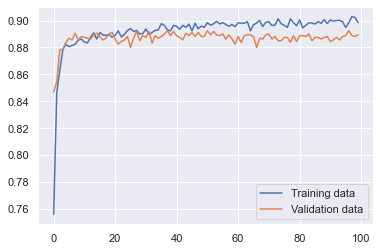

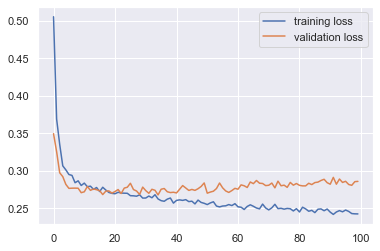

<Figure size 432x288 with 0 Axes>

In [279]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

loss=history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label="Training data")
plt.plot(epochs, val_acc, label="Validation data")
plt.legend(loc="lower right")
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend(loc="upper right")
plt.figure()

Podemos ver que no beneficia en nada aumentar la cantidad de epochs... la loss y la accuracy del set de validacion empieza a separarse del set de entrenamiento un claro de ejemplo de overfitting.

Vamos a probar que pasa si le agregamos otra loss y cambiamos a Adam ahora. Queremos ver si esto beneficia al modelo. Vamos a ver que pasa con la LR ahora que tenemos una nueva loss.

In [257]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch/20)
)

optimizer = tf.keras.optimizers.Adam(lr=1e-8)

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

history = model.fit(
    x= X_train,
    y= y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    callbacks=[lr_schedule],
    verbose=0
)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



(1e-08, 1.0, 0.0, 1.0)

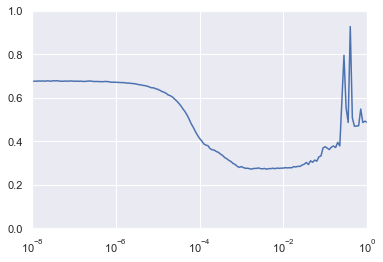

In [258]:
lrs = 1e-8 * (10 ** (np.arange(500)/20))
plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-8, 1, 0, 1])

hay un cambio considerado entre SGD y Adam. Adam parece que la mejor lr esta en 1e-3 mientras que en SGD estaba en 1e-2.

In [308]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

history = model.fit(
    x= X_train,
    y= y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    validation_steps=8,
    verbose=2
)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

200/200 - 0s - loss: 0.4793 - accuracy: 0.7833 - val_loss: 0.3539 - val_accuracy: 0.8506
Epoch 2/20
200/200 - 0s - loss: 0.3616 - accuracy: 0.8520 - val_loss: 0.3181 - val_accuracy: 0.8650
Epoch 3/20
200/200 - 0s - loss: 0.3317 - accuracy: 0.8623 - val_loss: 0.3041 - val_accuracy: 0.8756
Epoch 4/20
200/200 - 0s - loss: 0.3140 - accuracy: 0.8719 - val_loss: 0.2957 - val_accuracy: 0.8769
Epoch 5/20
200/200 - 0s - loss: 0.3032 - accuracy: 0.8750 - val_loss: 0.2871 - val_accuracy: 0.8819
Epoch 6/

<Figure size 432x288 with 0 Axes>

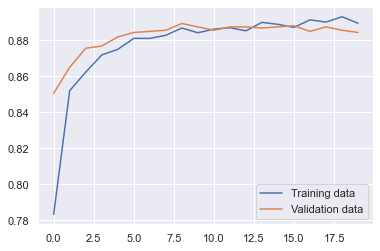

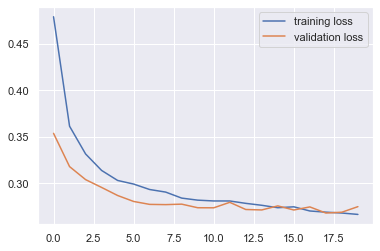

<Figure size 432x288 with 0 Axes>

In [309]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

loss=history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label="Training data")
plt.plot(epochs, val_acc, label="Validation data")
plt.legend(loc="lower right")
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend(loc="upper right")
plt.figure()

In [310]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

history = model.fit(
    x= X_train,
    y= y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    validation_steps=8,
    verbose=2
)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

200/200 - 0s - loss: 0.5213 - accuracy: 0.7373 - val_loss: 0.3556 - val_accuracy: 0.8500
Epoch 2/100
200/200 - 1s - loss: 0.3727 - accuracy: 0.8458 - val_loss: 0.3207 - val_accuracy: 0.8581
Epoch 3/100
200/200 - 1s - loss: 0.3402 - accuracy: 0.8589 - val_loss: 0.3074 - val_accuracy: 0.8719
Epoch 4/100
200/200 - 0s - loss: 0.3237 - accuracy: 0.8655 - val_loss: 0.2978 - val_accuracy: 0.8769
Epoch 5/100
200/200 - 0s - loss: 0.3146 - accuracy: 0.8703 - val_loss: 0.2892 - val_accuracy: 0.8838
Epo

Epoch 75/100
200/200 - 0s - loss: 0.2447 - accuracy: 0.8995 - val_loss: 0.2800 - val_accuracy: 0.8894
Epoch 76/100
200/200 - 0s - loss: 0.2450 - accuracy: 0.9013 - val_loss: 0.2811 - val_accuracy: 0.8875
Epoch 77/100
200/200 - 0s - loss: 0.2431 - accuracy: 0.9020 - val_loss: 0.2820 - val_accuracy: 0.8900
Epoch 78/100
200/200 - 0s - loss: 0.2423 - accuracy: 0.9022 - val_loss: 0.2809 - val_accuracy: 0.8844
Epoch 79/100
200/200 - 0s - loss: 0.2412 - accuracy: 0.9025 - val_loss: 0.2886 - val_accuracy: 0.8869
Epoch 80/100
200/200 - 0s - loss: 0.2438 - accuracy: 0.9006 - val_loss: 0.2829 - val_accuracy: 0.8869
Epoch 81/100
200/200 - 0s - loss: 0.2427 - accuracy: 0.9019 - val_loss: 0.2813 - val_accuracy: 0.8856
Epoch 82/100
200/200 - 0s - loss: 0.2436 - accuracy: 0.8992 - val_loss: 0.2830 - val_accuracy: 0.8863
Epoch 83/100
200/200 - 0s - loss: 0.2401 - accuracy: 0.9020 - val_loss: 0.2811 - val_accuracy: 0.8881
Epoch 84/100
200/200 - 0s - loss: 0.2422 - accuracy: 0.9031 - val_loss: 0.2808 - v

<Figure size 432x288 with 0 Axes>

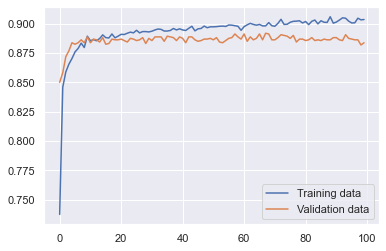

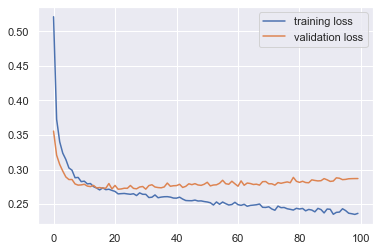

<Figure size 432x288 with 0 Axes>

In [311]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

loss=history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label="Training data")
plt.plot(epochs, val_acc, label="Validation data")
plt.legend(loc="lower right")
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend(loc="upper right")
plt.figure()

Conclusion podemos ver que ambas losses (Adam y SGD) no les benefica en nada tener mas de 20 epochs. Me quedaria con SGD ya que tiende a entrenar un poco mas rapido y genera curvas mas suaves, tiene mejor % en el test de validacion tanto como en el de loss y en el de accuracy.

Esta funcion se genero para facilitar el limpiado de datos en todo el grupo. Solamente se necesita pasarle el dataframe y solito va a hacer los cambios necesarios y devuelve los datos de entrenamiento y validacion ya separados para meterlos en diferentes modelos y probar la performance.

In [172]:
def cleaner(dataframe):
    var_num = dataframe[['Edad', 
              'Antigüedad', 
              'PuntuacionCrediticia', 
              'FacturacionTotal', 
              'CantidadProductos', 
              'SalarioEstimado']]
    var_cat = dataframe[[
        'Genero', 
        'Pais', 
        'Pais', 
        'MiembroActivo', 
        'VelocidadServicio']]
    y = dataframe['Abandono'].values
    one_hot = OneHotEncoder()
    scaler = RobustScaler()
    lb = LabelBinarizer()
    var_cat_oh = one_hot.fit_transform(var_cat)
    var_num_sc = scaler.fit_transform(var_num)
    df_cat = pd.DataFrame(var_cat_oh.toarray())
    df_num = pd.DataFrame(var_num_sc)
    X = pd.concat([df_cat, df_num], axis=1)
    y_lb = lb.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_lb, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [173]:
X_train, X_test, y_train, y_test = cleaner(pd.read_csv('train_churnes.csv'))

In [174]:
X_train.shape

(6400, 21)